# THE SPARKS FOUNDATION

### GRIP : DATA SCIENCE & BUSINESS ANALYTICS INTERN - JUNE 2021

### Submitted by : Pathi Samanvitha

### TASK-1 :    Prediction Using Supervised ML       

### Problem Statement : Predict the percentage of a student based on no. of study hours using supervised machine learning

#### Supervised ML :
Supervised ML is a kind of machine learning where the machine is trained using labelled data. Supervised ML problems are futher classified into 2 types :<br>1. Classification <br> 2. Regression <br> In this project, Simple Linear Regression is used as it involves predictiong numerical label i.e., predicting the score based on hours spent. 

### Importing required libraries

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

### Reading data from URL

In [112]:
data = pd.read_csv("http://bit.ly/w-data")

### Understanding data

In [113]:
#Structure of data
data.shape

(25, 2)

In [114]:
# Info about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


#### Type of Attributes :
   'Hours'  : Continuous variable <br>'Scores' : Discrete variable <br>

#### Checking first and last 5 rows 

In [115]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [116]:
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


### Checking null values

In [117]:
data.isna().sum()

Hours     0
Scores    0
dtype: int64

There are no missing values.

### Outliers

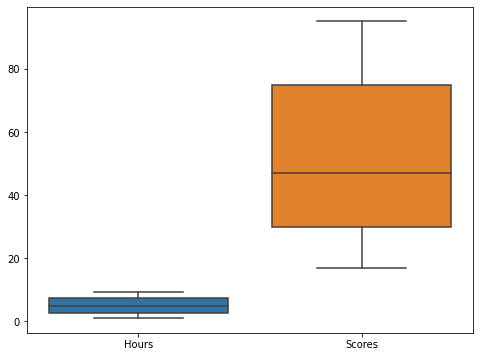

In [118]:
plt.figure(figsize=(8,6))
sns.boxplot(data=data)
plt.show()

There are no outliers in both the columns.

### Descriptive Statistics

In [119]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Scatterplot 

To check the relationship between 'Hours' and 'Scores'

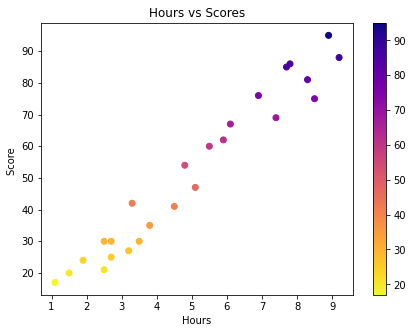

In [120]:
plt.figure(figsize=(7,5))
plt.scatter(x=data['Hours'],y=data['Scores'],c=data['Scores'],cmap='plasma_r')
plt.title('Hours vs Scores')
plt.xlabel('Hours')
plt.ylabel('Score ')
plt.colorbar()
plt.show()

The plot shows positive linear relationship between no. of hours spent and scores obtained

### Correlation

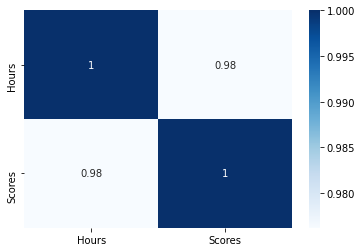

In [121]:
d=data.corr()
sns.heatmap(d,annot=True,cmap='Blues')
plt.show()

So, the above scatterplot and heatmap, there's a strong postive correlation between two variables

### Train & Test 

In [150]:
X=data.drop('Scores',axis=1)  # Target variable
Y=data['Scores']   # Feature varibale

# Splitting data into train (80%) & test data (20%)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

### Modelling

In [151]:
LR=LinearRegression()
LR.fit(X_train,Y_train) #fitting the model
print('Training done !')

Training done !


### Linear Regression equation

In [152]:
coeff=np.round(LR.coef_[0],2)
intercepts=np.round(LR.intercept_,2)
print(f'Scores={coeff}', 'x Hours +',intercepts)

Scores=9.94 x Hours + 1.51


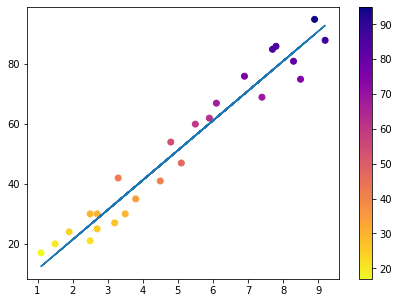

In [153]:
# Plotting regression line
regressor_line=LR.coef_*X+LR.intercept_
plt.figure(figsize=(7,5))
plt.scatter(X,Y,c=Y,cmap='plasma_r')
plt.plot(X,regressor_line)
plt.colorbar()
plt.show()

### Predictions

In [154]:
Y_pred=LR.predict(X_test) #Predicting scores on test data

In [155]:
# Actual vs Predicted
a=pd.DataFrame({'Actual Scores':Y_test,'Predicted Scores':Y_pred})
a

,Actual Scores,Predicted Scores
14,17,12.442587
0,21,26.359448
17,24,20.395079
6,88,92.961570
23,76,70.098155


### Evaluating the model

In [156]:
print('Mean absolute error = ',metrics.mean_absolute_error(Y_test,Y_pred))
print('Mean squared error = ',metrics.mean_squared_error(Y_test,Y_pred))
print('Root Mean squared error = ',np.sqrt(metrics.mean_squared_error(Y_test,Y_pred)))
print('R2 Score = ',metrics.r2_score(Y_test,Y_pred))

Mean absolute error =  4.877039354964476
Mean squared error =  24.387620339856596
Root Mean squared error =  4.9383823606376005
R2 Score =  0.9735538080811826


### Predicted score if a student studies for 9.25 hrs/ day?

In [158]:
hours=input('Enter no. of hours spent per day : ')
hours=float(hours)
pred=LR.predict([[hours]])[0]
print('Predicted score if a student studies for', f'{hours} hrs/day is',pred)

Enter no. of hours spent per day : 9.25
Predicted score if a student studies for 9.25 hrs/day is 93.45860055685799
